`63070501061 S.RAKNA`

> 1.5 hr.

# Min Distance classifier on 3 Gaussian Classes
Modify your **KNN program from quiz 1 with 3 classes** to create 50 random points for each class: red, blue, and yellow from a 2D Gaussian distribution (see *Gaussian Data.ipynb*) with 
- means: `(20, 30), (40, 40), (50, 40`) 
- and `(s_x, s_y)` of `(3, 10), (10, 10), (15, 15)`, for *red*, *blue*, and *yellow*, respectively. 
- Use **70%** of the dataset as training data and **30%** as testing data.

> 5 pts. 

<h4>Plot the 3 classes using the training data.</h4>

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(19680801)

DATA = {
    'red': {
        'mean': {
            'x': 20,
            'y': 30
        },
        'std': {
            'x': 3,
            'y': 10
        }
    },
    'blue': {
        'mean': {
            'x': 40,
            'y': 40
        },
        'std': {
            'x': 10,
            'y': 10
        }
    },
    'yellow': {
        'mean': {
            'x': 50,
            'y': 40
        },
        'std': {
            'x': 15,
            'y': 15
        }
    }
}

POINTS = 50
TRAIN = 0.7
TEST = 1 - TRAIN

MIN = 0
MAX = 100

In [3]:
# create training data from 2-d gaussian distributions
def generate_data(number, data):
    # return [[x: float, y: float, label: str], ...]
    points = np.array([], dtype=object)  # [[x, y], [x, y], ...]: np.float32
    labels = np.array([])  # [label, label, ...]
    for label, values in data.items():
        mean = np.array([values['mean']['x'], values['mean']['y']])
        std = np.array([values['std']['x'], values['std']['y']])
        # point: multivariate normal distribution
        point = np.random.multivariate_normal(mean, np.diag(std), number)
        if len(points) == 0:
            points = point
        else:
            points = np.append(points, point, axis=0)
        labels = np.append(labels, np.array([label] * number))
    # zipping
    return np.array(list(zip(points, labels)), dtype=object)

In [4]:
raw_data = generate_data(POINTS, DATA)
print(raw_data[:5])

[[array([21.50012777, 33.31819158]) 'red']
 [array([22.99311853, 31.74284063]) 'red']
 [array([19.17135299, 27.94677069]) 'red']
 [array([21.67802872, 33.40857199]) 'red']
 [array([17.8567792 , 27.44062704]) 'red']]


In [5]:
# random split into training and test data: train 70%, test 30%
np.random.shuffle(raw_data)
train_data = raw_data[int(POINTS * TRAIN):]
test_data = raw_data[:int(POINTS * TRAIN)]


In [6]:
def plot_data(data):
    colors = {'red': 'r', 'blue': 'b', 'yellow': 'y'}
    for point, label in data:
        plt.scatter(point[0], point[1], c=colors[label])
    plt.show()

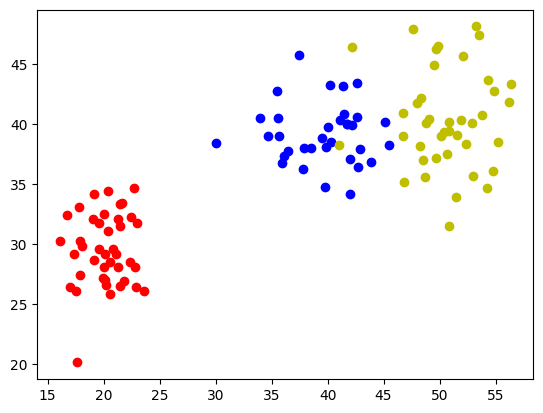

In [7]:
plot_data(train_data)

> 5 pts. 

Using `KNN with K = 5`, report the total accuracy of the testing data.

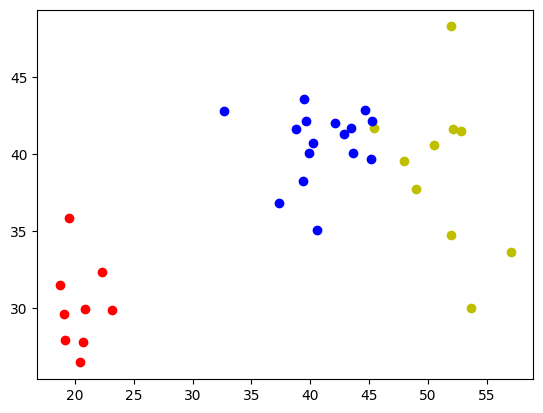

In [8]:
# PLOT using color map
plot_data(test_data)

In [9]:
# create classifier
knn = cv.ml.KNearest_create()
# numberize labels
label_map = {'red': 0, 'blue': 1, 'yellow': 2}
train_labels = [label_map[label] for point, label in train_data]
# train classifier
points, labels = np.array(
    [point for point, label in train_data]), np.array(train_labels)
# convert type to compatible with knn.train
points, labels = points.astype(np.float32), labels.astype(np.float32)
knn.train(points, cv.ml.ROW_SAMPLE, labels)


True

In [10]:
# test classifier
K = 5
#  find the K nearest neighbors
ret, results, neighbours, dist = knn.findNearest(points, K)
#  get the most common class label
correct = 0
for i, result in enumerate(results):
    label = label_map[train_data[i][1]]
    if result == label:
        correct += 1
print('Accuracy: ', correct / len(results))

Accuracy:  0.9826086956521739


### Using the minimum distance classifier:

> 5 pts

Report the training data cluster mean for each class of `red`, `blue`, and `yellow`.

In [11]:
# Report the training data cluster mean for each class of `red`, `blue`, and `yellow`.
unique_labels, label_indices, label_counts = np.unique(
    train_data[:, 1], return_inverse=True, return_counts=True)
points_by_label = np.split(train_data[:, 0], np.cumsum(label_counts[:-1]))
means = [np.mean(points, axis=0) for points in points_by_label]
for label, mean in zip(unique_labels, means):
    print(f'{label}: {mean}')


blue: [37.27737008 36.25270523]
red: [38.79010045 36.74945932]
yellow: [33.41348564 35.45942924]


> 5 pts

Report the total accuracy of the testing data using this classifier.

In [12]:
# Report the total accuracy of the testing data using minimum distance classifier.
def min_distance_classifier(point, means):
    # return label
    label_map = {'red': 0, 'blue': 1, 'yellow': 2}
    labels = list(label_map.keys())
    distances = [np.linalg.norm(point - mean) for mean in means]
    return labels[np.argmin(distances)]


In [13]:
# test classifier
correct = 0
for point, label in test_data:
    if min_distance_classifier(point, means) == label:
        correct += 1
print('Accuracy: ', correct / len(test_data))

Accuracy:  0.4
